# <center>IRIS CLASSIFICATION USING ANN

#### Loading the dependencies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import seaborn as sns

In [2]:
data = sns.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 5)

In [7]:
print(data.isnull().mean()*100)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64


In [8]:
print(data.duplicated().sum())

1


In [9]:
data.drop_duplicates(inplace=True)

#### Label encoding the target column

In [10]:
LE = LabelEncoder()

In [11]:
data.species = LE.fit_transform(data.species)

In [12]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
43,5.0,3.5,1.6,0.6,0
23,5.1,3.3,1.7,0.5,0
49,5.0,3.3,1.4,0.2,0
130,7.4,2.8,6.1,1.9,2
112,6.8,3.0,5.5,2.1,2
77,6.7,3.0,5.0,1.7,1
92,5.8,2.6,4.0,1.2,1
75,6.6,3.0,4.4,1.4,1
61,5.9,3.0,4.2,1.5,1
145,6.7,3.0,5.2,2.3,2


In [13]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [14]:
dummy_y = np_utils.to_categorical(y)

In [15]:
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, dummy_y, test_size=0.2, random_state=42)

#### We can see that the target is now One Hot Encoded.

In [17]:
x.shape

(149, 4)

#### Buliding Artificial Neural Network model

In [18]:
model = Sequential()
model.add(Dense(16, input_shape=(4,), activation = 'relu'))
model.add(Dense(3, activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


#### Compiling the model

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### Early stopping callbacks

In [20]:
es = EarlyStopping(monitor='val_loss',
                  mode= 'min',
                patience=10,
                   restore_best_weights=True
                  )

#### Fitting the model

In [21]:
history = model.fit(x_train, y_train, callbacks=[es],epochs=500, batch_size = 10, shuffle=True, validation_split=0.2)

Epoch 1/500
10/10 [==============================] - 1s 35ms/step - loss: 2.2015 - accuracy: 0.2737 - val_loss: 1.5237 - val_accuracy: 0.5000
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 1.9502 - accuracy: 0.2737 - val_loss: 1.3796 - val_accuracy: 0.5000
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 1.7359 - accuracy: 0.2737 - val_loss: 1.2722 - val_accuracy: 0.5000
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 1.5655 - accuracy: 0.2737 - val_loss: 1.1900 - val_accuracy: 0.5000
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 1.4292 - accuracy: 0.2737 - val_loss: 1.1156 - val_accuracy: 0.5000
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 1.3117 - accuracy: 0.2737 - val_loss: 1.0401 - val_accuracy: 0.5000
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 1.1980 - accuracy: 0.2842 - val_loss: 0.9696 - val_accuracy: 0.5417
Epoch 8/500


Epoch 59/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4116 - accuracy: 0.9158 - val_loss: 0.4755 - val_accuracy: 1.0000
Epoch 60/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4078 - accuracy: 0.9474 - val_loss: 0.4703 - val_accuracy: 1.0000
Epoch 61/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4042 - accuracy: 0.9474 - val_loss: 0.4667 - val_accuracy: 1.0000
Epoch 62/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.9474 - val_loss: 0.4607 - val_accuracy: 1.0000
Epoch 63/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3972 - accuracy: 0.9474 - val_loss: 0.4621 - val_accuracy: 1.0000
Epoch 64/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3941 - accuracy: 0.9263 - val_loss: 0.4573 - val_accuracy: 1.0000
Epoch 65/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.9474 - val_loss: 0.4438 - val_accuracy: 1.0000
Epoch 

10/10 [==============================] - 0s 4ms/step - loss: 0.2537 - accuracy: 0.9579 - val_loss: 0.2915 - val_accuracy: 1.0000
Epoch 117/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2541 - accuracy: 0.9684 - val_loss: 0.2765 - val_accuracy: 1.0000
Epoch 118/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2519 - accuracy: 0.9579 - val_loss: 0.2894 - val_accuracy: 0.9583
Epoch 119/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2482 - accuracy: 0.9579 - val_loss: 0.2894 - val_accuracy: 0.9583
Epoch 120/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2454 - accuracy: 0.9579 - val_loss: 0.2792 - val_accuracy: 1.0000
Epoch 121/500
10/10 [==============================] - 0s 5ms/step - loss: 0.2437 - accuracy: 0.9684 - val_loss: 0.2738 - val_accuracy: 1.0000
Epoch 122/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2438 - accuracy: 0.9684 - val_loss: 0.2825 - val_accuracy: 0.9583
Epoch 123/500

10/10 [==============================] - 0s 4ms/step - loss: 0.1714 - accuracy: 0.9684 - val_loss: 0.1852 - val_accuracy: 1.0000
Epoch 174/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1706 - accuracy: 0.9684 - val_loss: 0.1823 - val_accuracy: 1.0000
Epoch 175/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1702 - accuracy: 0.9579 - val_loss: 0.1975 - val_accuracy: 0.9583
Epoch 176/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1682 - accuracy: 0.9684 - val_loss: 0.1888 - val_accuracy: 0.9583
Epoch 177/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1675 - accuracy: 0.9684 - val_loss: 0.1730 - val_accuracy: 1.0000
Epoch 178/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1687 - accuracy: 0.9684 - val_loss: 0.1685 - val_accuracy: 1.0000
Epoch 179/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1653 - accuracy: 0.9684 - val_loss: 0.1759 - val_accuracy: 1.0000
Epoch 180/500

10/10 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.9684 - val_loss: 0.1284 - val_accuracy: 1.0000
Epoch 231/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1293 - accuracy: 0.9684 - val_loss: 0.1202 - val_accuracy: 1.0000
Epoch 232/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1296 - accuracy: 0.9684 - val_loss: 0.1193 - val_accuracy: 1.0000
Epoch 233/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1283 - accuracy: 0.9684 - val_loss: 0.1283 - val_accuracy: 1.0000
Epoch 234/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1272 - accuracy: 0.9789 - val_loss: 0.1375 - val_accuracy: 0.9583
Epoch 235/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1284 - accuracy: 0.9789 - val_loss: 0.1412 - val_accuracy: 0.9583
Epoch 236/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1278 - accuracy: 0.9789 - val_loss: 0.1298 - val_accuracy: 0.9583
Epoch 237/500

#### Evaluating the model

In [22]:
history_dict = history.history

#### 1. Learning curve

In [23]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

#### 2. Loss

In [24]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

#### 3. Range of x or number of epochs in the graph

In [25]:
epochs = range(1, len(acc)+1)

#### 4. Plot

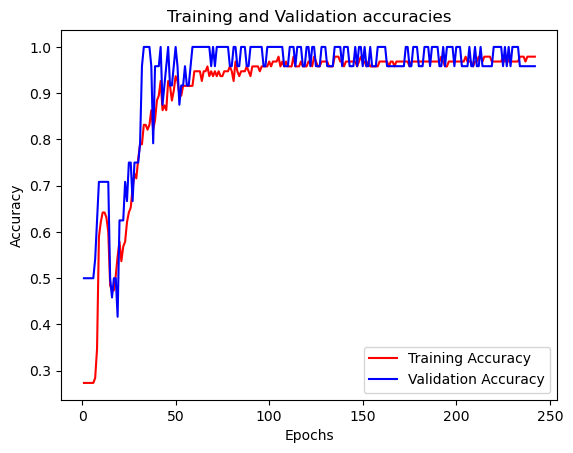

In [26]:
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title("Training and Validation accuracies")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
pred = model.predict(x)

5/5 [==============================] - 0s 999us/step


In [28]:
np.set_printoptions(suppress=True)

##### spreading that prediction across three nodes and they sum to 1

In [29]:
(pred[0])

array([0.9945956 , 0.00540441, 0.00000002], dtype=float32)

In [30]:
dummy_y[0]

array([1., 0., 0.], dtype=float32)

##### Sum should be 1

In [31]:
np.sum(pred[0])

1.0

##### Almost perfect prediction

#### Confusion matrix

In [32]:
matrix = confusion_matrix(dummy_y.argmax(axis = 1), pred.argmax(axis = 1))

In [33]:
matrix

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 48]], dtype=int64)

In [34]:
print(classification_report(dummy_y.argmax(axis = 1), pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        49

    accuracy                           0.98       149
   macro avg       0.98      0.98      0.98       149
weighted avg       0.98      0.98      0.98       149

